In [1]:
#!pip install shapely
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
#from shapely.geometry import Polygon
#%matplotlib notebook
%matplotlib ipympl

* **The required libraries/packages are imported : pyplot for plotting, FuncAnimation for animation, and PillowWriter for saving the animation in gif format.**
* **The Polygon package can also be used to plot polygons directly with a list of their vertex coordinates given as an input parameter to a function.**
* **The magic command, `%matplotlib notebook`, is used for interactive plotting in jupyter notebook; which must be replaced with `%matplotlib ipympl` in JupyterHub.**

In [2]:
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,

**The function `init()` is used to set the limits for the axes to be displayed in the plot; here both x and y takes values in the range [-1.2 , 1.2].**

In [3]:
def update(frame):
    if frame<5: # frame between 0 and 5
        l1= interpolate(4+math.floor(frame))
        l2= interpolate(3+math.floor(frame))
    else: # frame between 0 and 5
        l1= interpolate(12-math.floor(frame))
        l2= interpolate(13-math.floor(frame))
    xs=l1[:,0]
    ys=l1[:,1]
    xt=l2[:,0]
    yt=l2[:,1]
    las=[]
    lbs=[]
    lat=[1]
    lbt=[0]
    if frame<5:
        for i in range(1,len(xs)-1):
            las=np.append(las,(xs[i],xs[i]))
            lbs=np.append(lbs,(ys[i],ys[i]))
        las=np.append(las,xs[-1])
        lbs=np.append(lbs,ys[-1])
        for i in range(1,len(xt)):
            lat=np.append(lat,(xt[i],xt[i]))
            lbt=np.append(lbt,(yt[i],yt[i]))
        xdata, ydata = morph(las, lbs, lat, lbt, frame-math.floor(frame))
    else:
        for i in range(1,len(xt)-1):
            las=np.append(las,(xt[i],xt[i]))
            lbs=np.append(lbs,(yt[i],yt[i]))
        las=np.append(las,xt[-1])
        lbs=np.append(lbs,yt[-1])
        for i in range(1,len(xs)):
            lat=np.append(lat,(xs[i],xs[i]))
            lbt=np.append(lbt,(ys[i],ys[i]))
        xdata, ydata = morph(lat, lbt, las, lbs, frame-math.floor(frame))

    xdata=np.insert(xdata,0,1)
    ydata=np.insert(ydata,0,0)
    xd,yd=interpolate(0,listo=np.stack((xdata,ydata),axis=1),dummy=True)
    ln.set_data(xd,yd)
    return ln,

* **The function `update()` takes frame as an input, calls the `interpolate()` function to obtain the list of vertices required to plot the polygons.**
* **The list of vertices for two consecutive polygons is then passed into the morph function, which returns a list of vertices for all the intermediate polygon shapes possible. The value of alpha to be passed into `morph()` function is manipulated so as to ensure that it stays within the range [0,1].**
* **The animation starts from a triangle and when the value of frame equals 5, it retraces the path and hence, animation can be reversed, i.e octagon to triangle.**
* **This way of morphing only the vertices of the polygon and then interpolating it uses the logic of vector traversal.**
* **Another way could be morphing all the coordinates of the polygon, instead of morphing only the vertices. The following code uses this logic:**
```python 
def update(frame):
    if frame<5: # frame between 0 and 5
        xs,ys= interpolate(4+math.floor(frame))
        xt,yt= interpolate(3+math.floor(frame))
    else:       # frame between 5 and 10
        xs,ys= interpolate(12-math.floor(frame))
        xt,yt= interpolate(13-math.floor(frame))
    xdata, ydata = morph(xs, ys, xt, yt, frame-math.floor(frame))
    ln.set_data(xdata, ydata)
    return ln,
```

In [4]:
def interpolate(n,listo=[],dummy=False):
    l=[]
    for i in range(n):
        l.append((np.cos(2*np.pi*i/n),np.sin(2*np.pi*i/n))) # vertices of n-sided polygon
    if not dummy:
        return np.array(l)
    lis=[]
    if dummy:
        l=listo.copy()
    alpha=np.linspace(1,0, int(840))
    for i in range(len(l)):
        (x1,y1)=l[i]
        if i!=len(l)-1: (x2,y2)=l[i+1]
        else: (x2,y2)=l[0]
        for j in alpha:
            xm = j * x1 + (1-j) * x2 # obtaining the points between the two vertices
            ym = j * y1 + (1-j) * y2
            lis.append((xm,ym))
    lis=np.array(lis)
    return lis[:,0],lis[:,1]

* **The `interpolate()` function has an input parameter n, for an n-sided regular polygon with circumcircle of radius 1 unit and generates the list of coordinates of the polygon by interpolating the straight line between vertices, which can be obtained easily. It also takes another list 'listo', which might be the list of vertices of the polygon to be plotted; and a dummy variable.**
* **The number 840 is chosen to ensure that there are equal number of points on each edge of every n-sided polygon, where n goes from 3 to 8.**

In [5]:
def morph(x1, y1, x2, y2, alpha):
    #alpha=math.pow(alpha,1)
    xm = alpha * x1 + (1-alpha) * x2 # interior division between two coordinates
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym

**The function `morph()` generates intermediate coordinates, given the intial and final ones, and the division ratio 'alpha'.**

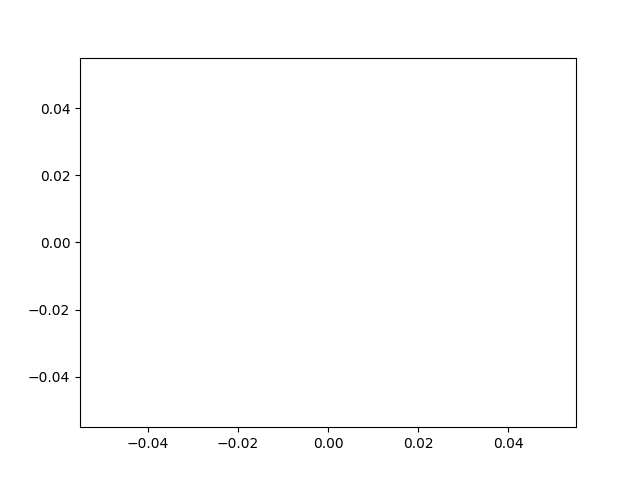

In [6]:
fig, ax = plt.subplots()
ln, = ax.plot([], [], 'r')
fps=128*6
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, fps)[:fps-2],init_func=init, blit=True, interval=10, repeat=True)
#ani.save("Animation3.gif", dpi=300, writer=PillowWriter(fps=25))
plt.show()

* **The figure and axes object is created using `plt.subplots()`, which returns a tuple that has to be unpacked and then an empty line object `ln` which is essentially the one to be modified in the animation.**
* **The animation object `ani` is created by calling the function `FuncAnimation()` with the required parameters passed into it.**
* **The animation can also be saved in the gif format using the `PillowWriter` class from `matplotlib.animation`.**